In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# import data
connections = pd.read_csv('connections_princeton.csv.gz', compression='gzip')
neurons = pd.read_csv('neurons.csv.gz', compression='gzip')
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940625363947,720575940623224444,ME_L,12,GABA
1,720575940630432382,720575940618518557,ME_L,67,ACH
2,720575940627314521,720575940626337738,ME_L,10,GABA
3,720575940620280405,720575940620204726,ME_L,15,ACH
4,720575940636942447,720575940613789411,LA_L,1,GLUT
...,...,...,...,...,...
5342441,720575940610739918,720575940617129885,PLP_L,5,ACH
5342442,720575940653332385,720575940623905719,CRE_R,2,ACH
5342443,720575940622485887,720575940631031803,ME_R,9,ACH
5342444,720575940620020534,720575940636489140,SMP_L,2,ACH


In [31]:
# merge dataframes for nt_type of post-synaptic neurons
connects_merged = pd.merge(connections[['post_root_id', 'neuropil', 'syn_count']], neurons[['root_id', 'nt_type']], left_on='post_root_id', right_on='root_id').drop(columns='root_id')
connects_merged

,post_root_id,neuropil,syn_count,nt_type
0,720575940623224444,ME_L,12,NaN
1,720575940618518557,ME_L,67,ACH
2,720575940626337738,ME_L,10,ACH
3,720575940620204726,ME_L,15,ACH
4,720575940613789411,LA_L,1,ACH
...,...,...,...,...
5342441,720575940617129885,PLP_L,5,GABA
5342442,720575940623905719,CRE_R,2,ACH
5342443,720575940631031803,ME_R,9,NaN
5342444,720575940636489140,SMP_L,2,GABA


In [32]:
connections[connections['nt_type']=='GABA'].groupby('nt_type').size()

nt_type
GABA    1172932
dtype: int64

In [33]:
connects_merged[connects_merged['nt_type']=='GABA'].groupby('nt_type').size()

nt_type
GABA    1130845
dtype: int64

In [36]:
# pivot table neuropil as rows, nt_type as columns and syn_count as values
pivot = connects_merged.pivot_table(index='nt_type', columns='neuropil', values='syn_count', aggfunc='size')
# fill NaN values with 0
pivot = pivot.fillna(0)
pivot

neuropil,AL_L,AL_R,AME_L,AME_R,AMMC_L,AMMC_R,AOTU_L,AOTU_R,ATL_L,ATL_R,...,SLP_R,SMP_L,SMP_R,SPS_L,SPS_R,UNASGD,VES_L,VES_R,WED_L,WED_R
nt_type,,,,,,,,,,,,,,,,,,,,,
ACH,25000.0,26391.0,725.0,633.0,13201.0,10507.0,11431.0,11933.0,4114.0,3539.0,...,37773.0,37594.0,40476.0,39200.0,48036.0,1868.0,17501.0,18808.0,19222.0,20586.0
DA,89.0,157.0,16.0,9.0,23.0,30.0,51.0,96.0,370.0,360.0,...,1506.0,4515.0,4986.0,771.0,858.0,28.0,555.0,471.0,479.0,494.0
GABA,9515.0,7280.0,355.0,336.0,7803.0,7089.0,2480.0,2646.0,1258.0,1248.0,...,9090.0,8122.0,9594.0,15202.0,18155.0,638.0,10062.0,10015.0,12158.0,12617.0
GLUT,2708.0,2860.0,511.0,533.0,1575.0,1607.0,2520.0,2458.0,2734.0,2491.0,...,22580.0,28543.0,29792.0,16179.0,17940.0,512.0,5366.0,5540.0,3022.0,3647.0
OCT,260.0,248.0,34.0,30.0,11.0,18.0,9.0,9.0,61.0,33.0,...,153.0,152.0,156.0,1155.0,1182.0,20.0,476.0,419.0,159.0,199.0
SER,3321.0,4396.0,121.0,95.0,20.0,94.0,5.0,42.0,79.0,71.0,...,398.0,797.0,803.0,128.0,104.0,49.0,12.0,67.0,40.0,66.0


In [42]:
# get the proportion of neurons of a nt_type in each neuropil 
def get_proportion(df, nt_type):
    df = df[df['nt_type'] == nt_type]
    return (df.groupby('neuropil').size() / df.groupby('neuropil').size().sum())*100

# use function to get proportions for GABA
proportions_gaba = get_proportion(connects_merged, 'GABA')
proportions_gaba

neuropil
AL_L      0.841406
AL_R      0.643766
AME_L     0.031392
AME_R     0.029712
AMMC_L    0.690015
            ...   
UNASGD    0.056418
VES_L     0.889777
VES_R     0.885621
WED_L     1.075125
WED_R     1.115714
Length: 79, dtype: float64

Text(0, 0.5, 'Percentage of Synapses (%)')

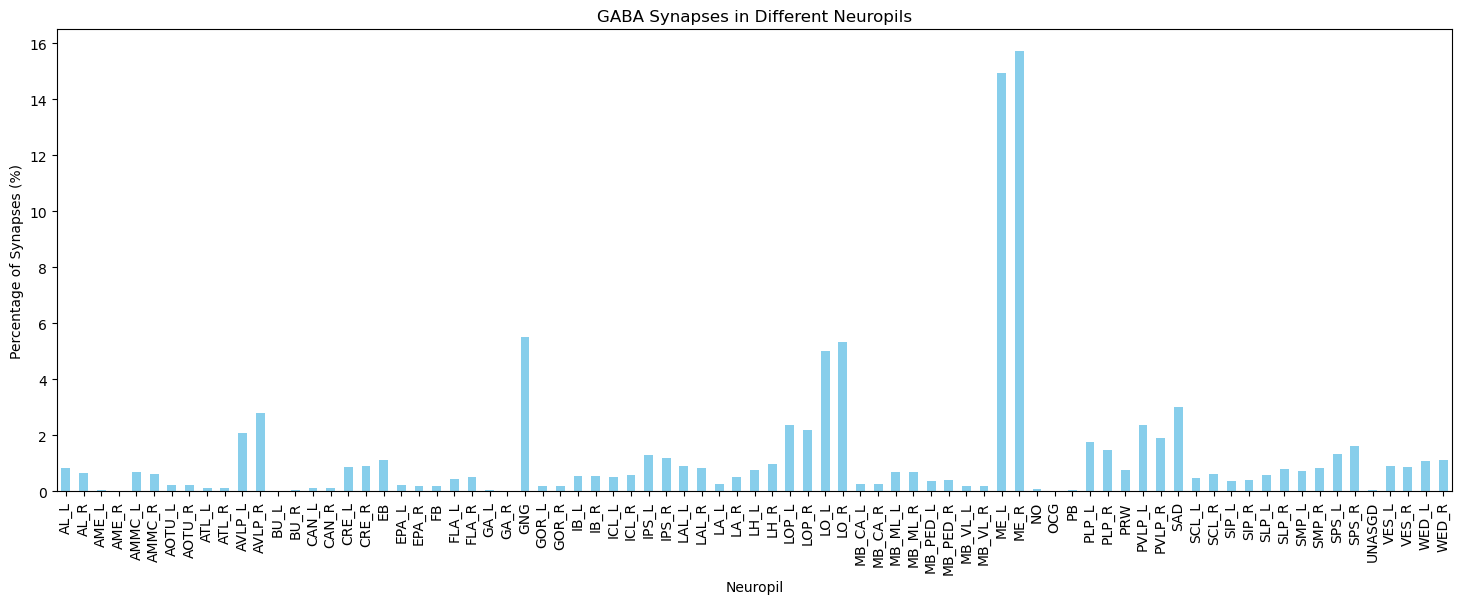

In [44]:
# plot this data, bar plot with neuropil on y-axis and syn_count on x-axis, just GABA
plt.figure(figsize=(18, 6))
proportions_gaba.plot(kind='bar', color='skyblue')
plt.title('GABA Synapses in Different Neuropils')
plt.xlabel('Neuropil' )
plt.ylabel('Percentage of Synapses (%)')
#plt.xticks(rotation=45)

Text(0, 0.5, 'Percentage of Synapses (%)')

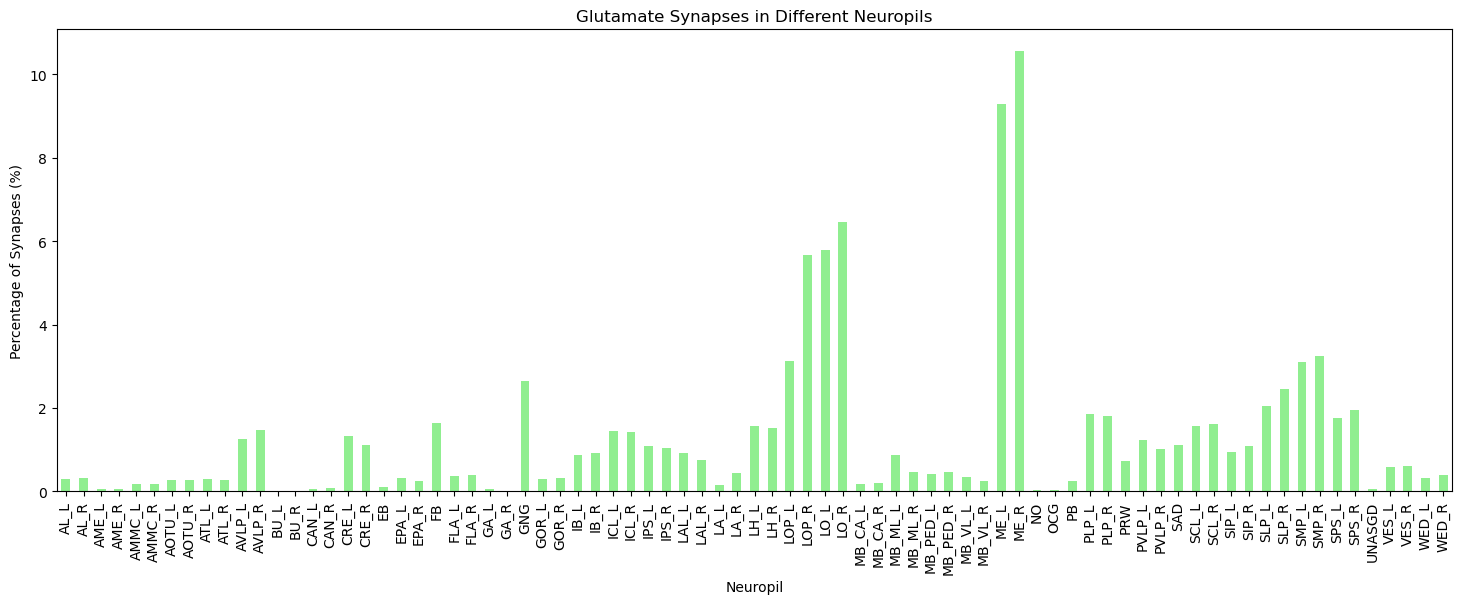

In [46]:
# for glutamate, use the same function
proportions_glutamate = get_proportion(connects_merged, 'GLUT')
# plot this data, bar plot with neuropil on y-axis and syn_count on x-axis, just glutamate
plt.figure(figsize=(18, 6))
proportions_glutamate.plot(kind='bar', color='lightgreen')
plt.title('Glutamate Synapses in Different Neuropils')
plt.xlabel('Neuropil')
plt.ylabel('Percentage of Synapses (%)')
